# AN ANALYSIS OF 6 UEFA LEAGUES FROM THE 2014/2015 - 2019/2020 SEASON.

## By: Hamoye Data Science/ Data Engineering Track: Multi-Collinearity Group.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Load DataSet

In [2]:
pwd = os.getcwd()

df_ori = pd.read_csv(pwd + "/DataSet/understat_per_game.csv/understat_per_game.csv")
df_ori.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


In [3]:
df = df_ori.copy()
df.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


### Data Cleaning

In [4]:
# Apply more descriptive names to columns

df.rename(columns = {"missed":"goals_conceded", "scored":"goals_scored", "date" : "old_date"}, inplace = True)
df.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'goals_scored', 'goals_conceded', 'xpts', 'result',
       'old_date', 'wins', 'draws', 'loses', 'pts', 'npxGD', 'ppda_coef',
       'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att', 'oppda_def', 'team',
       'xG_diff', 'xGA_diff', 'xpts_diff'],
      dtype='object')

In [5]:
def missing_column(df):
    """This is a function for checking dataframe columns for missing values. 

    Args:
        df : Pandas DataFrame
    """
    null_col_count = 0
    null_values_count = 0

    for col in df.columns:
        missing_values = df[col].isnull().sum()
        null_values_count += missing_values
        
        if df[col].isnull().any():
            null_col_count += 1  
            print(f"{col} has {null_values_count} null values.")

    print(" ")
    print(f"There are {null_col_count} columns with null values.")

missing_column(df)

 
There are 0 columns with null values.


In [6]:
# Split old_date column into date and time columns


df1 = df["old_date"].str.split(" ", expand = True)
 
df["date"]= df1[0]
 
df["time"]= df1[1]
 

df.head()


,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,goals_scored,...,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,date,time
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514,2014-08-22,19:30:00
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143,2014-08-30,17:30:00
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412,2014-09-13,14:30:00
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367,2014-09-20,14:30:00
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713,2014-09-23,19:00:00


In [7]:
# Change old_date column to date datatype

df["old_date"] =  pd.to_datetime(df["date"])

df["old_date"]

0       2014-08-22
1       2014-08-30
2       2014-09-13
3       2014-09-20
4       2014-09-23
           ...    
24575   2020-07-15
24576   2020-07-19
24577   2020-07-22
24578   2020-07-26
24579   2020-07-29
Name: old_date, Length: 24580, dtype: datetime64[ns]

In [8]:
# Change date column to date datatype.

df["date"] =  pd.to_datetime(df["date"])

df["date"]

0       2014-08-22
1       2014-08-30
2       2014-09-13
3       2014-09-20
4       2014-09-23
           ...    
24575   2020-07-15
24576   2020-07-19
24577   2020-07-22
24578   2020-07-26
24579   2020-07-29
Name: date, Length: 24580, dtype: datetime64[ns]

### Exploratory Data Analysis

In [9]:
temp_df = df[["deep", "deep_allowed", "goals_scored", "xG", "ppda_coef", "oppda_coef"]].copy()
temp_df

,deep,deep_allowed,goals_scored,xG,ppda_coef,oppda_coef
0,5,4,2,2.570120,9.625000,21.850000
1,10,1,1,1.503280,4.756098,17.695652
2,13,3,2,1.229870,5.060606,16.961538
3,6,2,0,1.035190,4.423077,9.446809
4,23,2,4,3.482860,4.250000,44.800000
...,...,...,...,...,...,...
24575,7,6,1,0.448154,15.500000,19.600000
24576,5,7,1,1.699320,12.650000,14.600000
24577,5,7,3,2.535110,13.777778,12.888889
24578,11,10,2,2.247360,25.454545,10.600000


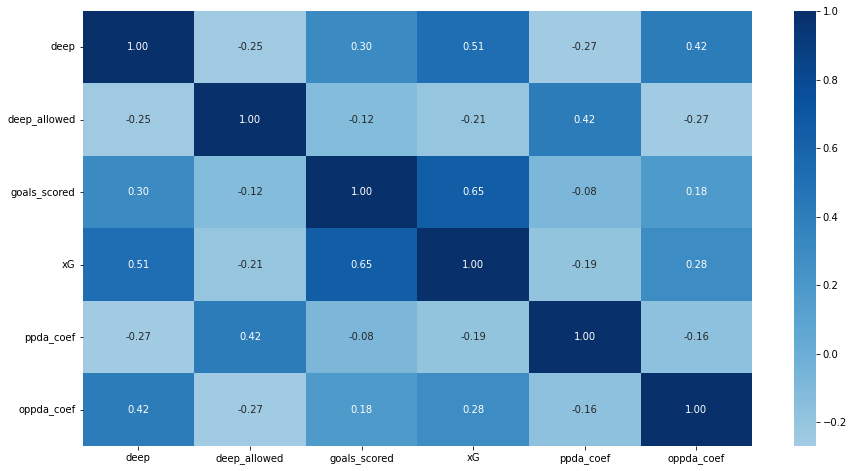

In [10]:
plt.figure(figsize = [15,8])

sns.heatmap(temp_df.corr(), cmap = "Blues", annot = True, fmt =".2f", center = 0);
plt.yticks(rotation = 0);

<Figure size 3600x1440 with 0 Axes>

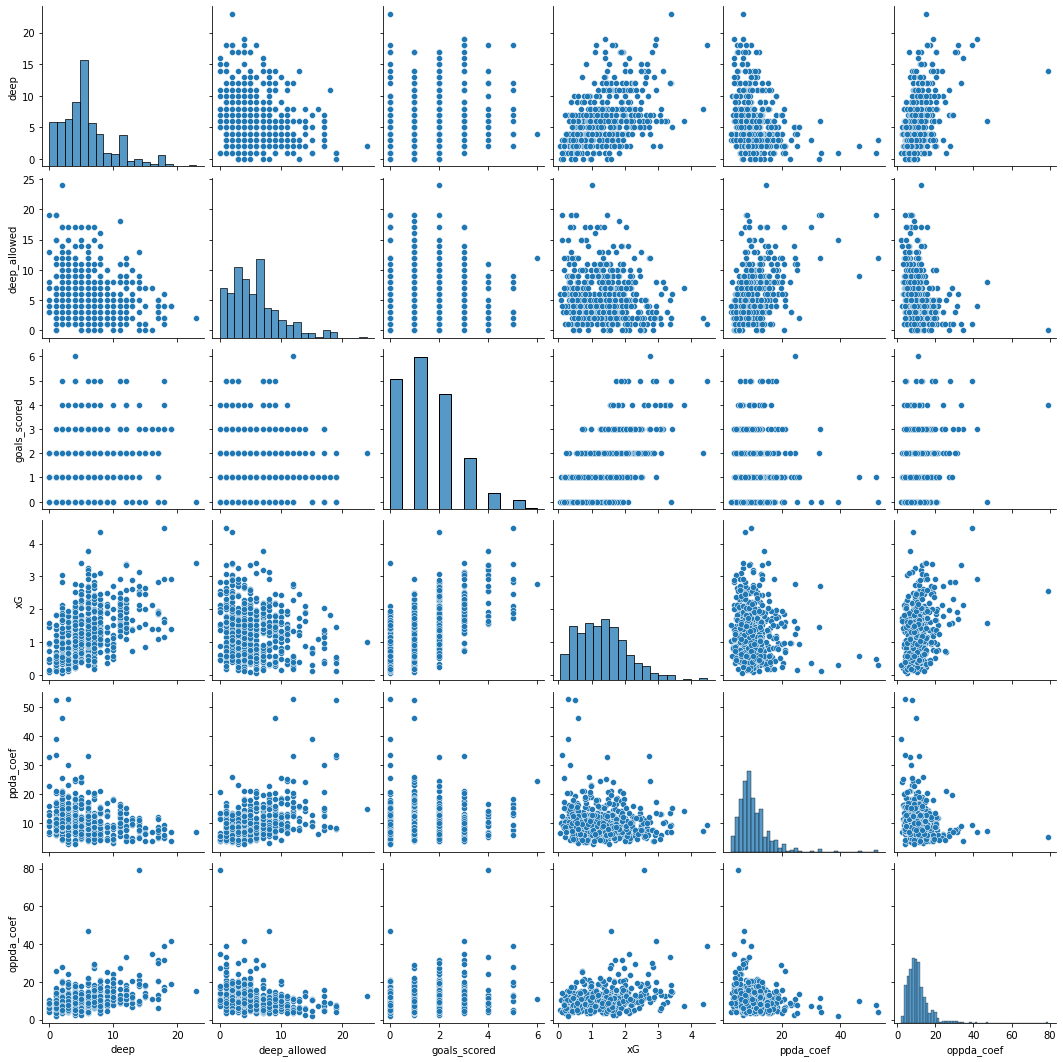

In [11]:
plt.figure(figsize=[50,20])

data_sample = temp_df.sample(n=500, replace=False, random_state  = 42)
sns.pairplot(data_sample);

In [12]:
def rel(x, y):
    """This is a function that prints correlation scatter plots for two columns in a Pandas DataFrame.

    Args:
        x : Pandas DataFrame column 
        y : Pandas DataFrame column
    """
    plt.figure(figsize = [15, 8])
    
    sns.regplot(data = df, x = x, y = y, scatter_kws={'alpha':0.5}, fit_reg = False)

    plt.title(f"Correlation between {x} and {y} is {df[x].corr(df[y]).round(2)}", fontsize = 20)
    plt.show()

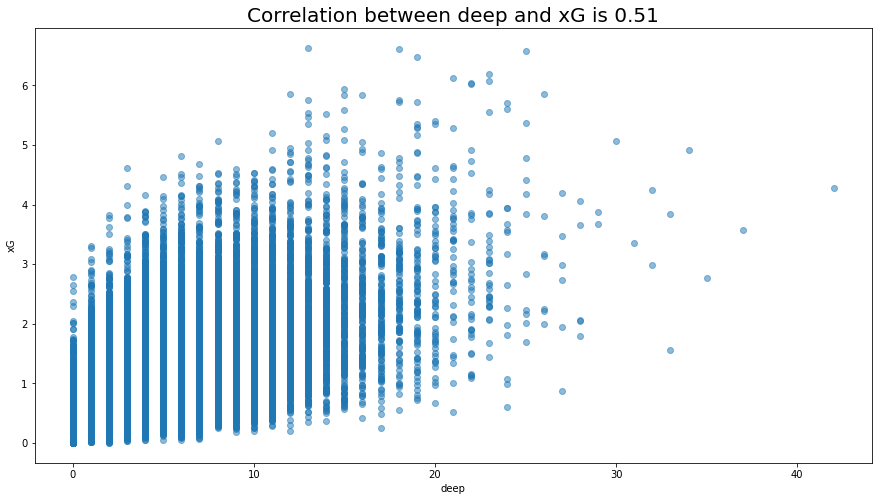

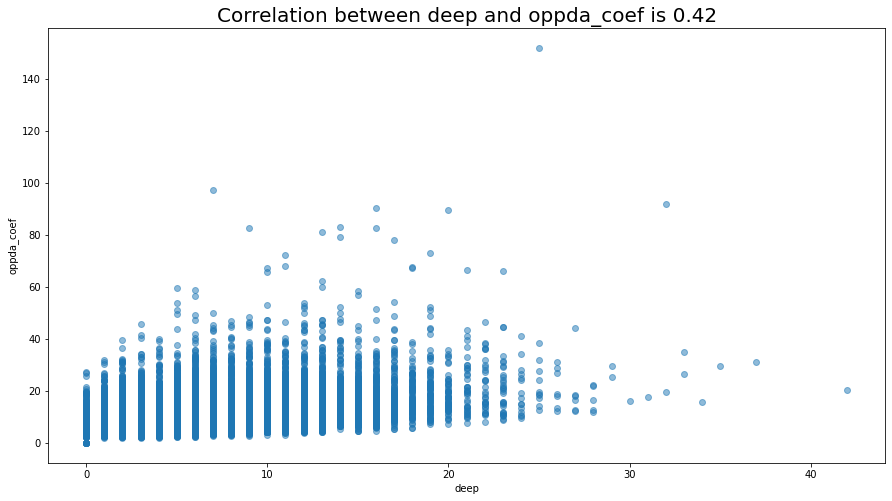

In [13]:
rel('deep','xG')
rel('deep','oppda_coef')

In [14]:
# Create total goals column

df["total_goals"] = df["goals_scored"] + df["goals_conceded"]
df["total_goals"].describe()

count    24580.000000
mean         2.682018
std          1.663437
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: total_goals, dtype: float64

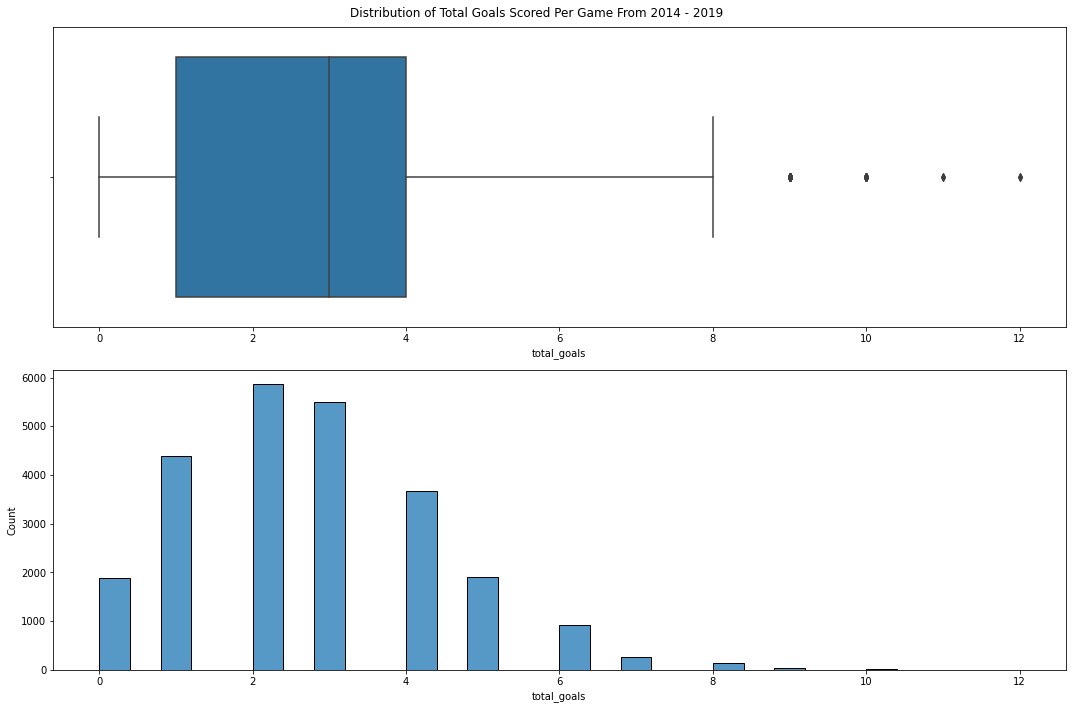

In [15]:
# Goal scored distribution

plt.figure(figsize = [15, 10])

plt.subplot(2, 1, 1)
sns.boxplot(data = df, x = 'total_goals')

plt.subplot(2, 1, 2)
sns.histplot(data = df, x='total_goals', bins = 30)

plt.suptitle('Distribution of Total Goals Scored Per Game From 2014 - 2019');

plt.tight_layout()

**Insight 1:** An average of about 3 goals were scored per match across the leagues.

In [16]:
df.groupby("league")["goals_scored"].sum().sort_values(ascending = True)

league
RFPL          3349
Bundesliga    5396
Ligue_1       5610
La_liga       6119
EPL           6189
Serie_A       6299
Name: goals_scored, dtype: int64

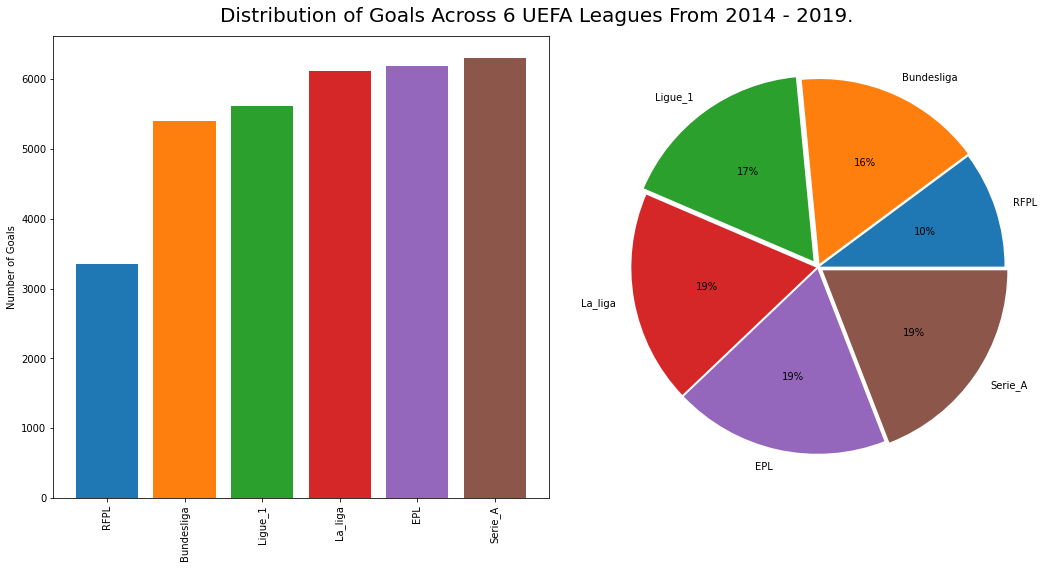

In [17]:
plt.figure(figsize = [15,8])

goals_by_league = df.groupby("league")["goals_scored"].sum(
    ).sort_values(ascending = True)

plt.subplot(1,2,1)
plt.bar(
    x = goals_by_league.index,
    height = goals_by_league,
    color = sns.color_palette()
)
plt.ylabel("Number of Goals")
plt.xticks(rotation = 90);
plt.suptitle("Distribution of Goals Across 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);

plt.subplot(1,2,2)
explode = np.array([0.01, 0.02, 0.04, 0.01, 0.01, 0.03])
plt.pie(x = goals_by_league, labels = goals_by_league.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()

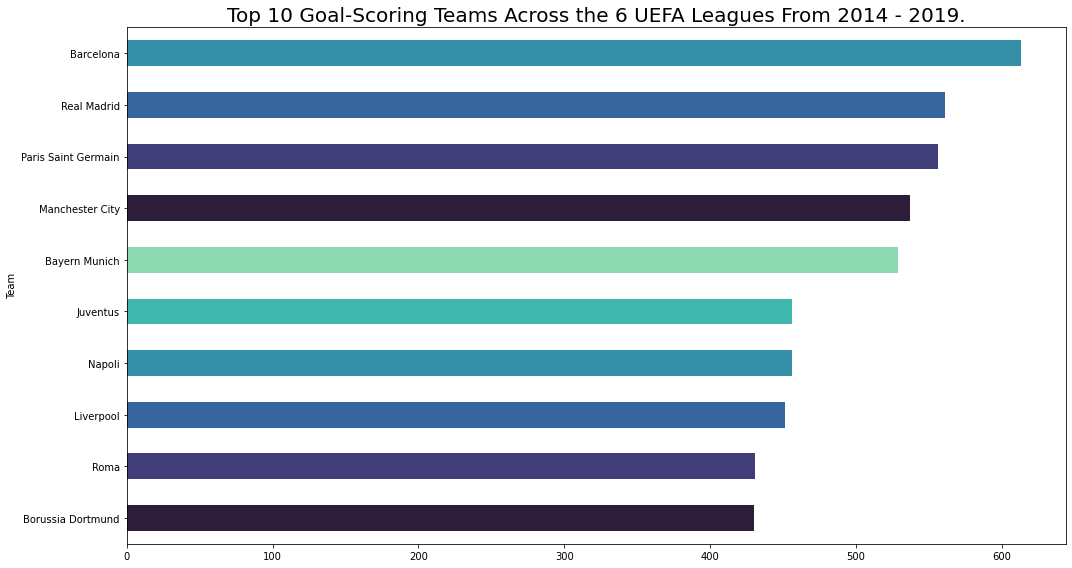

In [18]:
plt.figure(figsize = [15, 8])

df.groupby("team")["goals_scored"].sum().sort_values(ascending = True).tail(10).plot(
    kind = "barh",
    xlabel = "Team",
    color = sns.color_palette("mako")
);
plt.title("Top 10 Goal-Scoring Teams Across the 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);
plt.tight_layout();

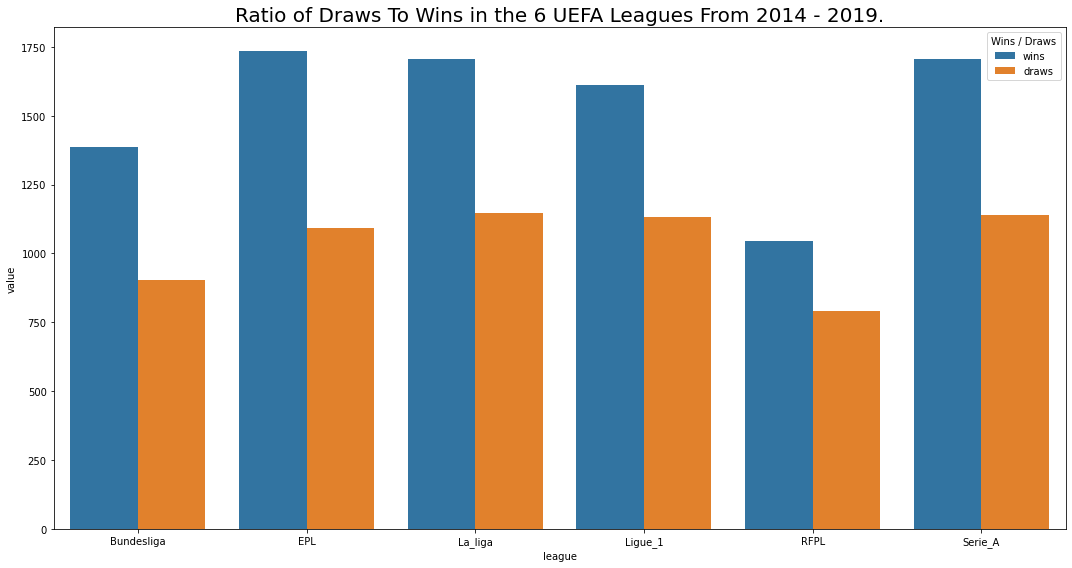

In [19]:
plt.figure(figsize = [15, 8])

palette = sns.color_palette()
wins_draws = df.groupby("league")[["wins", "draws"]].sum()
wins_draws2 = pd.melt(wins_draws.transpose().reset_index(
    ), id_vars = "index")

wins_draws2.rename(columns = {"index":"Wins / Draws"}, inplace = True)

# wins_draws2.columns

sns.barplot(data = wins_draws2, x = "league", y = "value", hue = "Wins / Draws", palette = palette);

plt.title("Ratio of Draws To Wins in the 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);
plt.tight_layout();

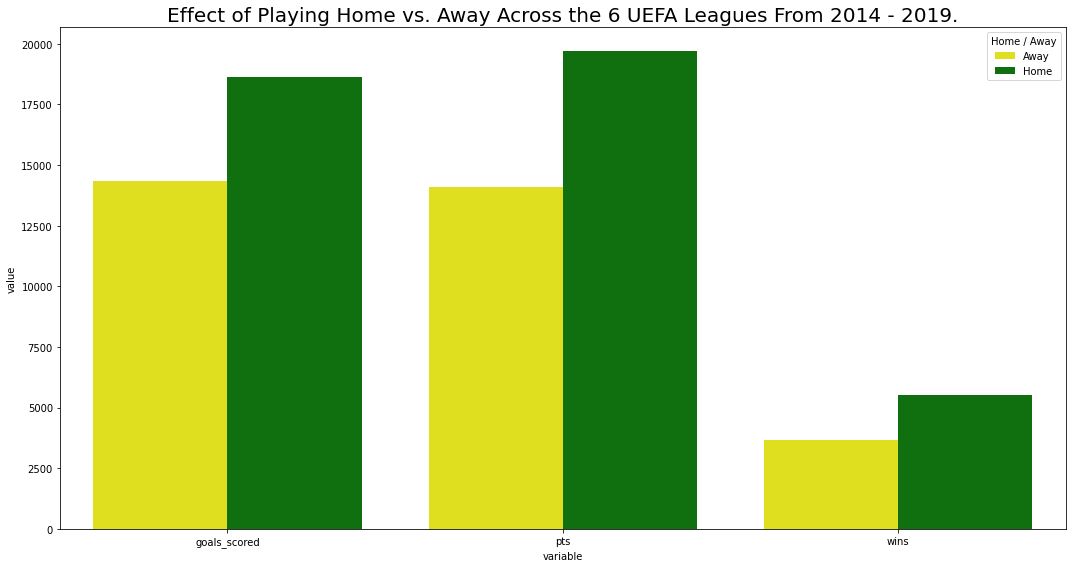

In [20]:
plt.figure(figsize = [15, 8])

palette = ["Yellow", "Green"]
h_a_df = df.groupby("h_a")[["goals_scored", "pts", "wins"]].sum().reset_index()
h_a_df2 = pd.melt(h_a_df, id_vars = "h_a")

h_a_df2.rename(columns = {"h_a":"Home / Away"}, inplace = True)
h_a_df2["Home / Away"].replace("h", "Home", inplace = True)
h_a_df2["Home / Away"].replace("a", "Away", inplace = True)

sns.barplot(data = h_a_df2, x = "variable", y = "value", hue = "Home / Away", palette = palette);
plt.title("Effect of Playing Home vs. Away Across the 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);
plt.tight_layout();

**Insight:** This shows an increased number of goals scored, points gained and matches won by home teams. With this, the data clearely supports the "idea" of home advantage across the UEFA leagues.

### Feature Engineering

In [21]:
# Create a column with values 1, for home match and 0 for away match

df["venue_code"] = df["h_a"].astype("category").cat.codes
df.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,goals_scored,...,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,date,time,total_goals,venue_code
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,437,20,Bayern Munich,0.57012,0.198420,-0.6514,2014-08-22,19:30:00,3,1
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,407,23,Bayern Munich,0.50328,0.307950,0.5143,2014-08-30,17:30:00,2,0
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,441,26,Bayern Munich,-0.77013,0.310166,-0.8412,2014-09-13,14:30:00,2,1
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,444,47,Bayern Munich,1.03519,0.203118,1.1367,2014-09-20,14:30:00,0,0
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,448,10,Bayern Munich,-0.51714,0.402844,-0.0713,2014-09-23,19:00:00,4,1


In [22]:
# Create a column to tell us within what hour of the day the match started

df["hour"] = df["time"].str.replace(":.+", " ", regex = True).astype(int)
df.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,goals_scored,...,oppda_def,team,xG_diff,xGA_diff,xpts_diff,date,time,total_goals,venue_code,hour
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,20,Bayern Munich,0.57012,0.198420,-0.6514,2014-08-22,19:30:00,3,1,19
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,23,Bayern Munich,0.50328,0.307950,0.5143,2014-08-30,17:30:00,2,0,17
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,26,Bayern Munich,-0.77013,0.310166,-0.8412,2014-09-13,14:30:00,2,1,14
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,47,Bayern Munich,1.03519,0.203118,1.1367,2014-09-20,14:30:00,0,0,14
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,10,Bayern Munich,-0.51714,0.402844,-0.0713,2014-09-23,19:00:00,4,1,19


In [23]:
# Create a column that assigns an integer to the day of the week a match was played.

df["day_code"] = df["date"].dt.dayofweek
df.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,goals_scored,...,team,xG_diff,xGA_diff,xpts_diff,date,time,total_goals,venue_code,hour,day_code
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,Bayern Munich,0.57012,0.198420,-0.6514,2014-08-22,19:30:00,3,1,19,4
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,Bayern Munich,0.50328,0.307950,0.5143,2014-08-30,17:30:00,2,0,17,5
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,Bayern Munich,-0.77013,0.310166,-0.8412,2014-09-13,14:30:00,2,1,14,5
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,Bayern Munich,1.03519,0.203118,1.1367,2014-09-20,14:30:00,0,0,14,5
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,Bayern Munich,-0.51714,0.402844,-0.0713,2014-09-23,19:00:00,4,1,19,1
